In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [ ]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
x_train = x_train[np.isin(y_train, [1,4,8]).flatten()]  # 1 car, 4 deer, 8 ship 
y_train = y_train[np.isin(y_train, [1,4,8]).flatten()]
x_test = x_test[np.isin(y_test, [1,4,8]).flatten()] # 1 car, 4 deer, 8 ship 
y_test = y_test[np.isin(y_test, [1,4,8]).flatten()]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15000, 32, 32, 3) (3000, 32, 32, 3) (15000, 1) (3000, 1)


True orginal label : [1]


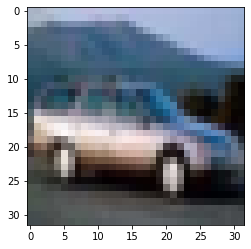

True orginal label : [1]


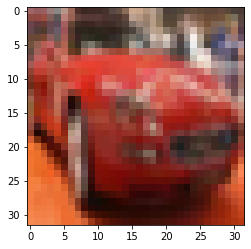

True orginal label : [8]


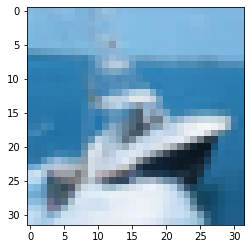

True orginal label : [4]


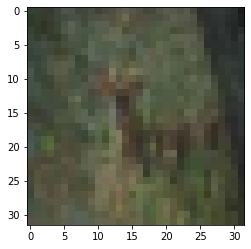

True orginal label : [4]


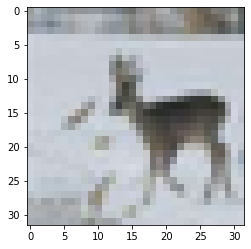

True orginal label : [4]


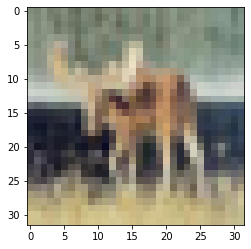

True orginal label : [1]


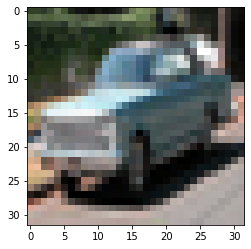

True orginal label : [4]


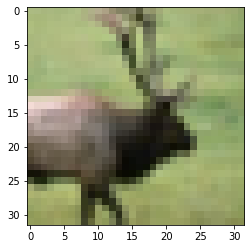

True orginal label : [1]


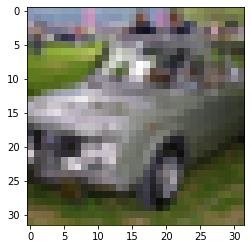

True orginal label : [1]


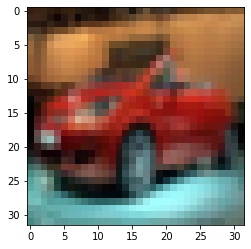

In [ ]:
example = 0
for i in range(10):
  example +=1
  plt.imshow(x_train[example])
  print("True orginal label :", y_train[example])
  plt.show(block=True)

In [ ]:
print(x_train.shape, x_test.shape)

(15000, 32, 32, 3) (3000, 32, 32, 3)


In [ ]:
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train  = x_train/255
x_test = x_test/255


In [ ]:
keras_model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(8, kernel_size=4, activation='relu', 
                           input_shape=x_train.shape[1:], padding='SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
    
  ])

keras_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 8)         392       
                                                                 
 flatten_32 (Flatten)        (None, 8192)              0         
                                                                 
 dense_64 (Dense)            (None, 100)               819300    
                                                                 
 dense_65 (Dense)            (None, 10)                1010      
                                                                 
Total params: 820,702
Trainable params: 820,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
learning_rate = 0.0005
 
keras_model.compile(run_eagerly=True, optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
 
history = keras_model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
469/469 [==============================] - 10s 21ms/step - loss: 0.1159 - accuracy: 0.7519
Epoch 2/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0852 - accuracy: 0.8321
Epoch 3/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0759 - accuracy: 0.8503
Epoch 4/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0688 - accuracy: 0.8658
Epoch 5/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0629 - accuracy: 0.8795
Epoch 6/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0590 - accuracy: 0.8869
Epoch 7/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0550 - accuracy: 0.8963
Epoch 8/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0514 - accuracy: 0.9025
Epoch 9/30
469/469 [==============================] - 10s 21ms/step - loss: 0.0480 - accuracy: 0.9090
Epoch 10/30
469/469 [==============================] - 10s 21ms/step - loss: 0.045

In [ ]:
y_pred = keras_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test,axis=1)
conf_mx = confusion_matrix(y_test,y_pred)
print(conf_mx)

[[874  37  89]
 [ 24 937  39]
 [ 78  67 855]]


In [ ]:
print("Wartość współczynnika f1: " + str(f1_score(y_test, y_pred, average="weighted")))
print("Wartość dokładności: " + str(accuracy_score(y_test, y_pred)))

Wartość współczynnika f1: 0.8883741839936372
Wartość dokładności: 0.8886666666666667


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.87      0.88      1000
           4       0.90      0.94      0.92      1000
           8       0.87      0.85      0.86      1000

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

